In [1]:
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## 数据清洗

### 找缺失值

In [3]:
import pandas as pd

df1 = pd.DataFrame([[3, 5, 3], [1, 6, np.nan], ['lili', np.nan, 'pop'],
                    [np.nan, 'a', 'b']])
df1

,0,1,2
0,3,5,3
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [4]:
# 显示 True 的为缺失值
df1.isnull()  

,0,1,2
0,False,False,False
1,False,False,True
2,False,True,False
3,True,False,False


In [5]:
# 显示 True 的为非空
df1.notnull()  

,0,1,2
0,True,True,True
1,True,True,False
2,True,False,True
3,False,True,True


统计每一列空值的个数。

In [5]:
df1.isnull().sum()

0    1
1    1
2    1
dtype: int64

In [6]:
# 统计全部空值的个数
df1.isnull().sum().sum()

3

In [8]:
# 转换成 numpy 格式
df1.isnull().values

array([[False, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False]])

In [9]:
# 只要有一个是空，则返回 True
df1.isnull().values.any()

True

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
0    3 non-null object
1    3 non-null object
2    3 non-null object
dtypes: object(3)
memory usage: 176.0+ bytes


### 删除缺失值

In [11]:
df1.dropna()

,0,1,2
0,3,5,3


In [29]:
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [30]:
# df2.ix[2, :] = np.nan 这种写法已经作废
df2.loc[2, :] = np.nan 
df2[3] = np.nan
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


只有这一行的数值全部为空，才删除这一行。

In [16]:
df2.dropna(how='all')

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN


只有这一列的数值全部为空，才删除这一列。

In [19]:
df2.dropna(how='all', axis=1)

,0,1,2
0,0.0,1.0,2.0
1,4.0,5.0,6.0
2,NaN,NaN,NaN


### 填充缺失值

In [21]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [22]:
df2.fillna(0)

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,0.0,0.0,0.0,0.0


传入一个 dict ，针对不同列替换成不同的值。

下面的例子中， 1 这一列的空值全部换成 666， 3 这一列的空值全部换成 888 。

In [25]:
df2.fillna({1: 666, 3: 888})

,0,1,2,3
0,0.0,1.0,2.0,888.0
1,4.0,5.0,6.0,888.0
2,NaN,666.0,NaN,888.0


就地替换空值。

In [31]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [32]:
df2.fillna({1: 666, 3: 888}, inplace=True)
df2

,0,1,2,3
0,0.0,1.0,2.0,888.0
1,4.0,5.0,6.0,888.0
2,NaN,666.0,NaN,888.0


### ffill 表示用前一个值填充

In [33]:
df2.fillna(method='ffill')

,0,1,2,3
0,0.0,1.0,2.0,888.0
1,4.0,5.0,6.0,888.0
2,4.0,666.0,6.0,888.0


In [34]:
df2

,0,1,2,3
0,0.0,1.0,2.0,888.0
1,4.0,5.0,6.0,888.0
2,NaN,666.0,NaN,888.0


In [35]:
# 得到一列
df2[0]

0    0.0
1    4.0
2    NaN
Name: 0, dtype: float64

In [36]:
# 得到一行
df2.loc[0]

0      0.0
1      1.0
2      2.0
3    888.0
Name: 0, dtype: float64

In [37]:
df2

,0,1,2,3
0,0.0,1.0,2.0,888.0
1,4.0,5.0,6.0,888.0
2,NaN,666.0,NaN,888.0


In [38]:
# 用一列的均值填充
df2[0] = df2[0].fillna(df2[0].mean())
df2

,0,1,2,3
0,0.0,1.0,2.0,888.0
1,4.0,5.0,6.0,888.0
2,2.0,666.0,NaN,888.0


In [32]:
df2.fillna?

### 移除重复的数据

In [39]:
data = {
    'name': ['张三', '李四', '张三', '小明'],
    'sex': ['female', 'male', 'female', 'male'],
    'year': [2001, 2002, 2001, 2002],
    'city': ['北京', '上海', '北京', '北京']
}
df1 = pd.DataFrame(data)
df1

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2002,上海
2,张三,female,2001,北京
3,小明,male,2002,北京


判断是否有重复行，第 $3$ 行重复了（与第 $1$ 行一样），所以显示 `True`。

In [40]:
df1.duplicated()

0    False
1    False
2     True
3    False
dtype: bool

删除重复行。

In [35]:
df1.drop_duplicates()

,city,name,sex,year
0,北京,张三,female,2001
1,上海,李四,male,2002
3,北京,小明,male,2002


<span class="burk">传入列的列表，表示只看这两列，这两列有重复的就只保留一个，`keep` 参数设置重复的数据保留哪一个，是第一个还是最后一个</span>。

In [36]:
df1.drop_duplicates(['sex', 'year'])

,city,name,sex,year
0,北京,张三,female,2001
1,上海,李四,male,2002


In [39]:
df1.drop_duplicates(['sex', 'year'], keep='last')

,city,name,sex,year
2,北京,张三,female,2001
3,北京,小明,male,2002


In [41]:
data = {
    'name': ['张三', '李四', '王五', '小明'],
    'sex': ['female', 'male', '', 'male'],
    'year': [2001, 2003, 2001, 2002],
    'city': ['北京', '上海', '', '北京']
}
df1 = DataFrame(data)
df1

,city,name,sex,year
0,北京,张三,female,2001
1,上海,李四,male,2003
2,,王五,,2001
3,北京,小明,male,2002


### 使用替换的方式，替换掉空字符串

In [42]:
df1.replace('', '不详')

,city,name,sex,year
0,北京,张三,female,2001
1,上海,李四,male,2003
2,不详,王五,不详,2001
3,北京,小明,male,2002


多值替换，可以传入列表，或者传入字典。

In [43]:
# 把 '' 换成 ’不详‘，
# 把 2001 换成 2002
df1.replace(['', 2001], ['不详', 2002])

,city,name,sex,year
0,北京,张三,female,2002
1,上海,李四,male,2003
2,不详,王五,不详,2002
3,北京,小明,male,2002


In [44]:
df1.replace({'': '不详', 2001: 2002})

,city,name,sex,year
0,北京,张三,female,2002
1,上海,李四,male,2003
2,不详,王五,不详,2002
3,北京,小明,male,2002


### 利用函数或者映射进行数据替换

map 函数针对一列替换，或者说 map 前面的对象是 Series。

apply 可以替换整个数据表，apply 前面的对象是 DataFrame。

In [41]:
data = {
    'name': ['张三', '李四', '王五', '小明'],
    'math': [79, 52, 63, 92]
}
df2 = pd.DataFrame(data)
df2

,name,math
0,张三,79
1,李四,52
2,王五,63
3,小明,92


In [43]:
def f(x):
    if x >= 90:
        return '优秀'
    elif 70 <= x < 90:
        return '良好'
    elif 60 <= x < 70:
        return '合格'
    else:
        return '不合格'

In [44]:
df2['class'] = df2['math'].map(f)
df2

,name,math,class
0,张三,79,良好
1,李四,52,不合格
2,王五,63,合格
3,小明,92,优秀


In [45]:
del df2['class']
df2

,name,math
0,张三,79
1,李四,52
2,王五,63
3,小明,92


In [46]:
df2['class'] = df2['math'].apply(f)
df2

,name,math,class
0,张三,79,良好
1,李四,52,不合格
2,王五,63,合格
3,小明,92,优秀


### 异常值检测

In [47]:
df3 = pd.DataFrame(np.arange(10), columns=['X'])

df3['Y'] = 2 * df3['X'] + 0.5
df3.iloc[9, 1] = 185
df3

,X,Y
0,0,0.5
1,1,2.5
2,2,4.5
3,3,6.5
4,4,8.5
5,5,10.5
6,6,12.5
7,7,14.5
8,8,16.5
9,9,185.0


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


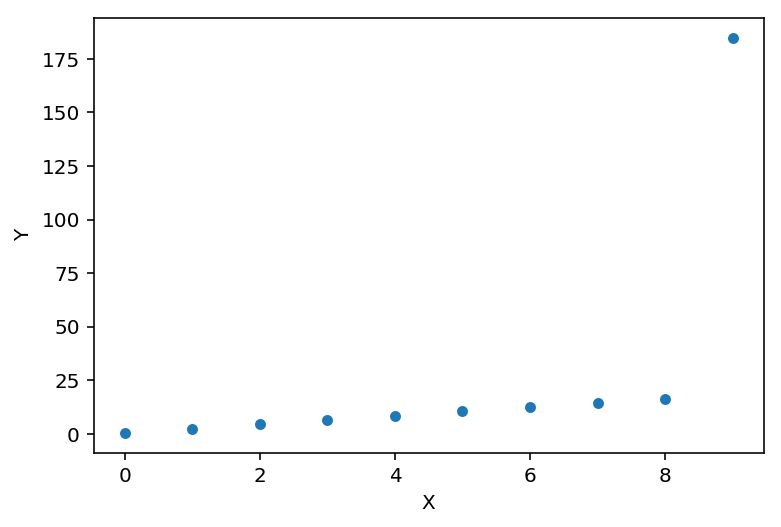

In [48]:
df3.plot(kind='scatter', x='X', y='Y')

In [49]:
df = pd.DataFrame({
    '朝向': ['东', '南', '东', '西', '北'],
    '价格': [1200, 2100, 2300, 2900, 1400]
})
df

,朝向,价格
0,东,1200
1,南,2100
2,东,2300
3,西,2900
4,北,1400


下面这个方法比较常用，用于将离散型数据独热编码。

In [51]:
pd.get_dummies(df['朝向'])

,东,北,南,西
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


In [53]:
df2 = pd.DataFrame({
    '朝向': ['东/北', '西/南', '东', '西/北', '北'],
    '价格': [1200, 2100, 2300, 2900, 1400]
})
df2

,朝向,价格
0,东/北,1200
1,西/南,2100
2,东,2300
3,西/北,2900
4,北,1400


<span class="burk">就是为了使用 `value_counts` 这个方法，所以才用 Series 包装了一下。</span>

In [16]:
dummies = df2['朝向'].apply(lambda x: Series(x.split('/')).value_counts())
dummies

,东,北,南,西
0,1.0,1.0,NaN,NaN
1,NaN,NaN,1.0,1.0
2,1.0,NaN,NaN,NaN
3,NaN,1.0,NaN,1.0
4,NaN,1.0,NaN,NaN


In [19]:
dummies = dummies.fillna(0).astype(int)
dummies

,东,北,南,西
0,1,1,0,0
1,0,0,1,1
2,1,0,0,0
3,0,1,0,1
4,0,1,0,0


## 合并数据 merge

In [55]:
price = pd.DataFrame({
    'fruit': ['apple', 'banana', 'orange'],
    'price': [23, 32, 45]
})
price

,fruit,price
0,apple,23
1,banana,32
2,orange,45


In [56]:
amount = pd.DataFrame({
    'fruit': ['apple', 'banana', 'apple', 'apple', 'banana', 'pear'],
    'amount': [5, 3, 6, 3, 5, 7]
})
amount

,fruit,amount
0,apple,5
1,banana,3
2,apple,6
3,apple,3
4,banana,5
5,pear,7


In [57]:
# 默认是内连接
pd.merge(amount, price)

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [47]:
# on 指定连接的列名
pd.merge(amount, price, on='fruit')

,amount,fruit,price
0,5,apple,23
1,6,apple,23
2,3,apple,23
3,3,banana,32
4,5,banana,32


其实可以分别对左表和右表指定不同的连接列名。

In [48]:
pd.merge(amount, price, left_on='fruit', right_on='fruit')

,amount,fruit,price
0,5,apple,23
1,6,apple,23
2,3,apple,23
3,3,banana,32
4,5,banana,32


指定左连接还是右连接。

In [49]:
pd.merge(amount, price, how='left')

,amount,fruit,price
0,5,apple,23.0
1,3,banana,32.0
2,6,apple,23.0
3,3,apple,23.0
4,5,banana,32.0
5,7,pear,NaN


In [50]:
pd.merge(amount, price, how='right')

,amount,fruit,price
0,5.0,apple,23
1,6.0,apple,23
2,3.0,apple,23
3,3.0,banana,32
4,5.0,banana,32
5,NaN,orange,45


In [52]:
pd.merge(amount, price, how='outer')

,amount,fruit,price
0,5.0,apple,23.0
1,6.0,apple,23.0
2,3.0,apple,23.0
3,3.0,banana,32.0
4,5.0,banana,32.0
5,7.0,pear,NaN
6,NaN,orange,45.0


In [53]:
price2 = pd.DataFrame({
    'fruit': ['apple', 'banana', 'orange', 'apple'],
    'price': [23, 32, 45, 25]
})
amount2 = pd.DataFrame({
    'fruit': ['apple', 'banana', 'apple', 'apple', 'banana', 'pear'],
    'amount': [5, 3, 6, 3, 5, 7]
})

In [54]:
amount2

,amount,fruit
0,5,apple
1,3,banana
2,6,apple
3,3,apple
4,5,banana
5,7,pear


In [55]:
price2

,fruit,price
0,apple,23
1,banana,32
2,orange,45
3,apple,25


In [57]:
pd.merge(amount2, price2)

,amount,fruit,price
0,5,apple,23
1,5,apple,25
2,6,apple,23
3,6,apple,25
4,3,apple,23
5,3,apple,25
6,3,banana,32
7,5,banana,32


In [59]:
left = DataFrame({
    'key1': ['one', 'one', 'two'],
    'key2': ['a', 'b', 'a'],
    'val1': [2, 3, 4]
})
right = DataFrame({
    'key1': ['one', 'one', 'two', 'two'],
    'key2': ['a', 'a', 'a', 'b'],
    'val2': [5, 6, 7, 8]
})

In [60]:
left

,key1,key2,val1
0,one,a,2
1,one,b,3
2,two,a,4


In [61]:
right

,key1,key2,val2
0,one,a,5
1,one,a,6
2,two,a,7
3,two,b,8


当两个键值相等的时候，才连接。

In [62]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,val1,val2
0,one,a,2.0,5.0
1,one,a,2.0,6.0
2,one,b,3.0,NaN
3,two,a,4.0,7.0
4,two,b,NaN,8.0


In [63]:
pd.merge(left, right, on='key1')

,key1,key2_x,val1,key2_y,val2
0,one,a,2,a,5
1,one,a,2,a,6
2,one,b,3,a,5
3,one,b,3,a,6
4,two,a,4,a,7
5,two,a,4,b,8


suffixes 重复列名使用什么后缀。

In [64]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,val1,key2_right,val2
0,one,a,2,a,5
1,one,a,2,a,6
2,one,b,3,a,5
3,one,b,3,a,6
4,two,a,4,a,7
5,two,a,4,b,8


In [66]:
left2 = DataFrame({
    'key': ['a', 'a', 'b', 'b', 'c'],
    'val1': range(5)
})
right2 = DataFrame({
    'val2': [5, 7]},
    index=['a', 'b']
)

In [67]:
left2

,key,val1
0,a,0
1,a,1
2,b,2
3,b,3
4,c,4


In [68]:
right2

,val2
a,5
b,7


right_index 表示指定右边的行索引作为连接键。

In [70]:
# right_index 表示指定右边的行索引作为连接键
pd.merge(left2, right2, left_on='key', right_index=True)

,key,val1,val2
0,a,0,5
1,a,1,5
2,b,2,7
3,b,3,7


### join ：按索引进行合并，merg 可以指定合并的列名

In [59]:
left3 = pd.DataFrame({
    'val1': range(4)},
    index=['a', 'b', 'a', 'c']
)
left3

,val1
a,0
b,1
a,2
c,3


In [60]:
right3 = pd.DataFrame({
    'val2': [5, 7]},
    index=['a', 'b']
)
right3

,val2
a,5
b,7


join 使用行索引作为连接键，就这点区别。

In [74]:
left3.join(right3, how='outer')

,val1,val2
a,0,5.0
a,2,5.0
b,1,7.0
c,3,NaN


### 连接

In [61]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3], index=['c', 'd'])
s3 = pd.Series([4, 5], index=['e', 'f'])

In [62]:
# Series 
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64

In [63]:
pd.concat([s1, s2, s3], axis=1)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,NaN,4.0
f,NaN,NaN,5.0


In [6]:
s4 = pd.concat([s1 * 10, s3])
s4

a     0
b    10
e     4
f     5
dtype: int64

In [8]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,10
e,NaN,4
f,NaN,5


In [9]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,10


In [14]:
pd.concat([s1, s4], axis=1, join='inner', join_axes=[['b', 'a']])

,0,1
b,1,10
a,0,0


In [15]:
pd.concat([s1, s4])

a     0
b     1
a     0
b    10
e     4
f     5
dtype: int64

In [17]:
pd.concat([s1, s4], keys=['one', 'two'])

one  a     0
     b     1
two  a     0
     b    10
     e     4
     f     5
dtype: int64

In [18]:
pd.concat([s1, s4], axis=1, keys=['one', 'two'])

,one,two
a,0.0,0
b,1.0,10
e,NaN,4
f,NaN,5


In [28]:
df1 = DataFrame({
    'val1': range(3)},
    index=['a', 'b', 'c']
)
df2 = DataFrame({
    'val2': [5, 7]},
    index=['a', 'b']
)

In [29]:
df1

,val1
a,0
b,1
c,2


In [30]:
df2

,val2
a,5
b,7


In [32]:
pd.concat([df1, df2], axis=1, keys=['one', 'two'])

,one,two
,val1,val2
a,0,5.0
b,1,7.0
c,2,NaN


In [33]:
pd.concat({'one': df1, 'two': df2}, axis=1)

,one,two
,val1,val2
a,0,5.0
b,1,7.0
c,2,NaN


In [34]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 2), columns=['d', 'c'])

In [35]:
df1

,a,b,c,d
0,0.023541,-0.694903,-0.515242,0.460737
1,-1.326048,0.259269,-0.685732,0.052237
2,-0.110079,2.729854,-0.503138,-1.721161


In [36]:
df2

,d,c
0,0.995995,-0.342845
1,0.848536,1.027354


In [37]:
pd.concat([df1, df2])

,a,b,c,d
0,0.023541,-0.694903,-0.515242,0.460737
1,-1.326048,0.259269,-0.685732,0.052237
2,-0.110079,2.729854,-0.503138,-1.721161
0,NaN,NaN,-0.342845,0.995995
1,NaN,NaN,1.027354,0.848536


In [38]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.023541,-0.694903,-0.515242,0.460737
1,-1.326048,0.259269,-0.685732,0.052237
2,-0.110079,2.729854,-0.503138,-1.721161
3,NaN,NaN,-0.342845,0.995995
4,NaN,NaN,1.027354,0.848536


In [39]:
df1 = DataFrame({
    'a': [3, np.nan, 6, np.nan],
    'b': [np.nan, 4, 6, np.nan]
})
df2 = DataFrame({
    'a': range(5),
    'b': range(5)
})

In [40]:
df1

,a,b
0,3.0,NaN
1,NaN,4.0
2,6.0,6.0
3,NaN,NaN


In [41]:
df2

,a,b
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [42]:
df1.combine_first(df2)

,a,b
0,3.0,0.0
1,1.0,4.0
2,6.0,6.0
3,3.0,3.0
4,4.0,4.0


In [48]:
df = DataFrame(np.arange(9).reshape(3, 3),
               index=['a', 'b', 'c'],
               columns=['one', 'two', 'three'])
df.index.name = 'alph'
df.columns.name = 'number'
df

number,one,two,three
alph,,,
a,0,1,2
b,3,4,5
c,6,7,8


In [50]:
result = df.stack()
result

alph  number
a     one       0
      two       1
      three     2
b     one       3
      two       4
      three     5
c     one       6
      two       7
      three     8
dtype: int32

In [51]:
result.unstack()

number,one,two,three
alph,,,
a,0,1,2
b,3,4,5
c,6,7,8


In [52]:
result.unstack(0)

alph,a,b,c
number,,,
one,0,3,6
two,1,4,7
three,2,5,8


In [53]:
result.unstack('alph')

alph,a,b,c
number,,,
one,0,3,6
two,1,4,7
three,2,5,8


In [54]:
df = DataFrame(np.arange(16).reshape(4, 4),
               index=[['one', 'one', 'two', 'two'], ['a', 'b', 'a', 'b']],
               columns=[['apple', 'apple', 'orange', 'orange'], ['red', 'green', 'red', 'green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [55]:
df.stack()

apple  orange
one a green      1       3
      red        0       2
    b green      5       7
      red        4       6
two a green      9      11
      red        8      10
    b green     13      15
      red       12      14

In [56]:
df.unstack()

apple               orange              
      red     green        red     green    
        a   b     a   b      a   b     a   b
one     0   4     1   5      2   6     3   7
two     8  12     9  13     10  14    11  15

In [71]:
data = {
    'data': ['张三|男', '李四|女', '王五|女', '小明|男'],
}
df = DataFrame(data)
df

,data
0,张三|男
1,李四|女
2,王五|女
3,小明|男


In [67]:
result = df['data'].apply(lambda x: Series(x.split('|')))
result

,0,1
0,张三,男
1,李四,女
2,王五,女
3,小明,男


In [81]:
new_df = df['data'].str.split('|')
new_df

0    [张三, 男]
1    [李四, 女]
2    [王五, 女]
3    [小明, 男]
Name: data, dtype: object

In [82]:
df['name'] = new_df.str[0]
df['sex'] = new_df.str[1]
df

,data,name,sex
0,张三|男,张三,男
1,李四|女,李四,女
2,王五|女,王五,女
3,小明|男,小明,男


In [83]:
df2 = DataFrame({
    'email': ['102345@qq.com', '342167@qq.com', '65132@qq.com']
})
df2

,email
0,102345@qq.com
1,342167@qq.com
2,65132@qq.com


In [84]:
df2['email'].str.findall('(.*?)@')

0    [102345]
1    [342167]
2     [65132]
Name: email, dtype: object

In [85]:
df2['QQ'] = df2['email'].str.findall('(.*?)@').str.get(0)
df2

,email,QQ
0,102345@qq.com,102345
1,342167@qq.com,342167
2,65132@qq.com,65132


In [101]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns  # 导入seaborn绘图库
%matplotlib inline

In [107]:
iris_data = pd.read_csv(open('H:\python数据分析\数据\iris-data.csv'))
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
iris_data.shape

(150, 5)

In [110]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [112]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [115]:
iris_data.ix[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.ix[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [142]:
pd.set_option('mode.chained_assignment', None)

OptionError: "No such keys(s): 'FutureWarning'"

F:\Anaconda\envs\data-analysis\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
F:\Anaconda\envs\data-analysis\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


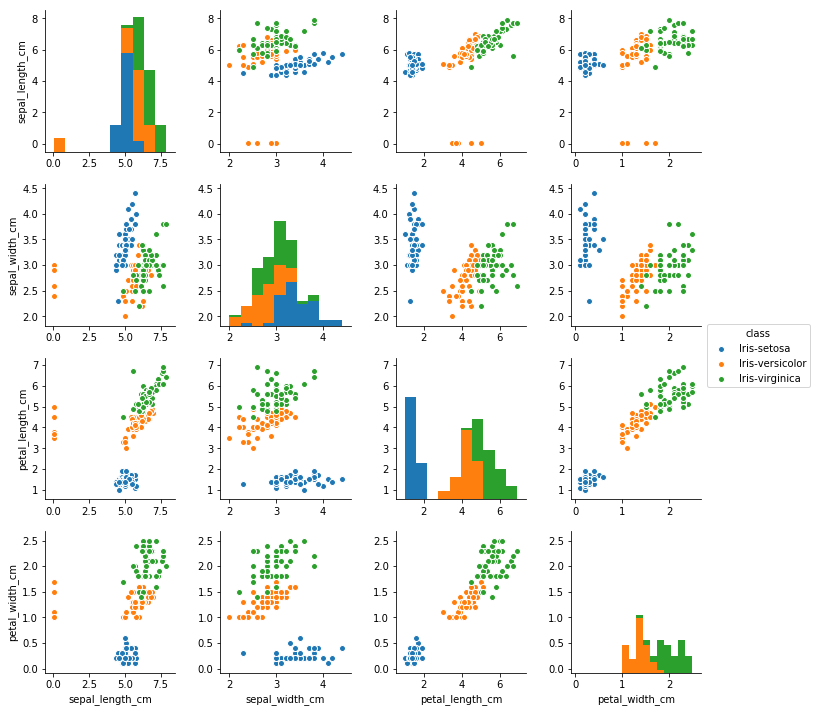

In [118]:
sns.pairplot(iris_data, hue='class')

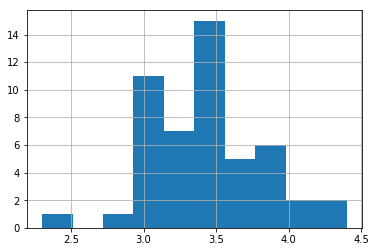

In [119]:
iris_data.ix[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

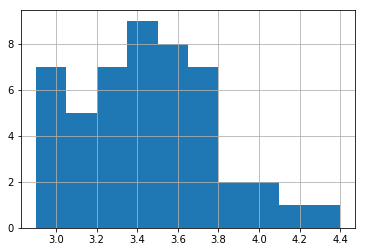

In [125]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa')
                          | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [126]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [127]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

In [128]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [131]:
iris_data[iris_data['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [132]:
iris_data.dropna(inplace=True)

In [133]:
iris_data.to_csv('H:\python数据分析\数据\iris-clean-data.csv', index=False)

In [135]:
iris_data = pd.read_csv(open('H:\python数据分析\数据\iris-clean-data.csv'))
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
iris_data.shape

(144, 5)

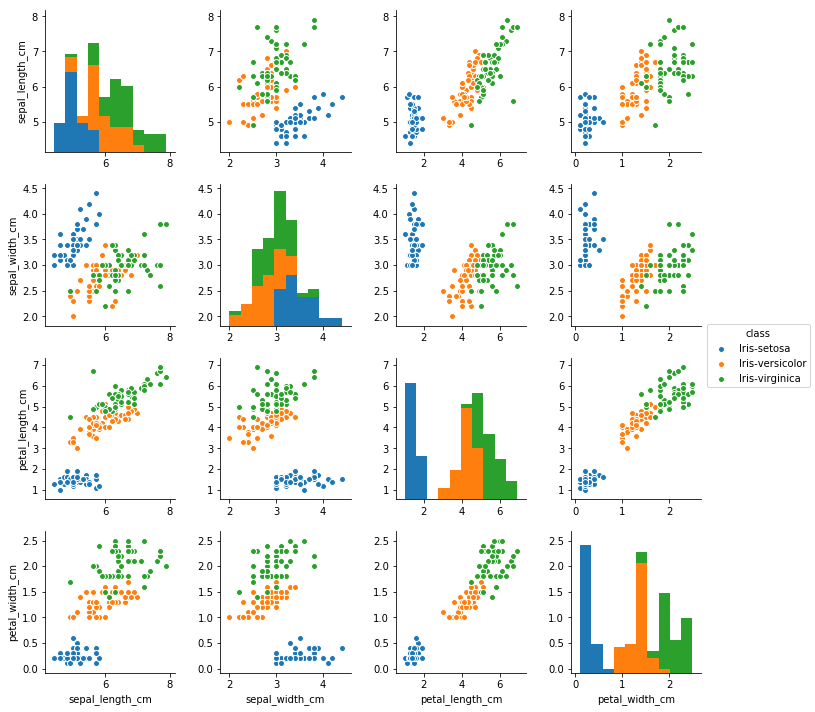

In [137]:
sns.pairplot(iris_data, hue='class')

F:\Anaconda\envs\data-analysis\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


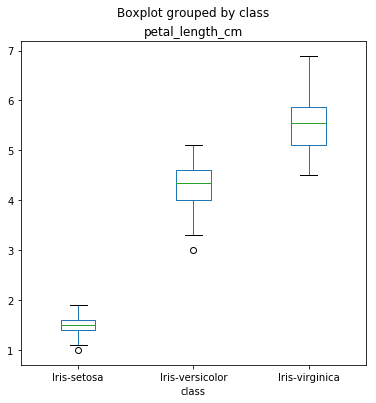

In [145]:
iris_data.boxplot(column='petal_length_cm', by='class',
                  grid=False, figsize=(6, 6))

In [139]:
iris_data.boxplot?